In [1]:
import pandas as pd
import numpy as np

In [2]:
teams = pd.read_csv("teams.csv")

In [3]:
teams

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
...,...,...,...,...,...,...,...,...,...
2009,ZIM,2000,26,19,25.0,179.0,71.1,0.0,0
2010,ZIM,2004,14,11,25.1,177.8,70.5,0.0,3
2011,ZIM,2008,16,15,26.1,171.9,63.7,3.0,4
2012,ZIM,2012,9,8,27.3,174.4,65.2,4.0,0


In [4]:
teams = teams[["team", "year", "athletes", "age", "prev_medals", "medals"]]

In [5]:
teams

,team,year,athletes,age,prev_medals,medals
0,AFG,1964,8,22.0,0.0,0
1,AFG,1968,5,23.2,0.0,0
2,AFG,1972,8,29.0,0.0,0
3,AFG,1980,11,23.6,0.0,0
4,AFG,2004,5,18.6,0.0,0
...,...,...,...,...,...,...
2009,ZIM,2000,26,25.0,0.0,0
2010,ZIM,2004,14,25.1,0.0,3
2011,ZIM,2008,16,26.1,3.0,4
2012,ZIM,2012,9,27.3,4.0,0


In [6]:
teams.corr()["medals"]

year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [7]:
import seaborn as sns

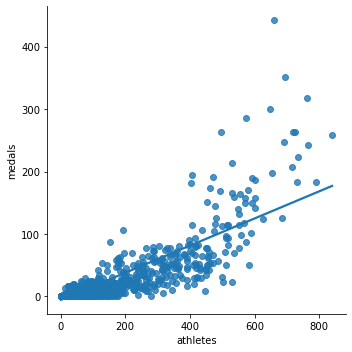

In [8]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

<AxesSubplot:ylabel='Frequency'>

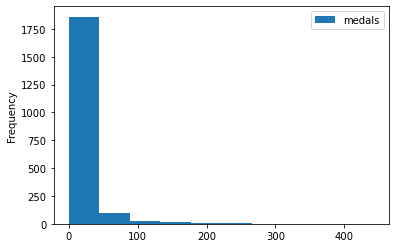

In [9]:
teams.plot.hist(y="medals")

In [10]:
teams[teams.isnull().any(axis=1)]

,team,year,athletes,age,prev_medals,medals


In [11]:
teams = teams.dropna()

In [12]:
teams

,team,year,athletes,age,prev_medals,medals
0,AFG,1964,8,22.0,0.0,0
1,AFG,1968,5,23.2,0.0,0
2,AFG,1972,8,29.0,0.0,0
3,AFG,1980,11,23.6,0.0,0
4,AFG,2004,5,18.6,0.0,0
...,...,...,...,...,...,...
2009,ZIM,2000,26,25.0,0.0,0
2010,ZIM,2004,14,25.1,0.0,3
2011,ZIM,2008,16,26.1,3.0,4
2012,ZIM,2012,9,27.3,4.0,0


In [13]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [14]:
train.shape

(1609, 6)

In [15]:
test.shape

(405, 6)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [17]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [18]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [19]:
predictions = reg.predict(test[predictors])

In [20]:
test["predictions"] = predictions

In [21]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,-0.961221
7,AFG,2016,3,24.7,1.0,0,-1.176333
23,ALB,2012,10,25.7,0.0,0,-1.425032
24,ALB,2016,6,23.7,0.0,0,-1.711847
35,ALG,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,-1.926958
2001,ZAM,2012,7,22.6,0.0,0,-1.640143
2002,ZAM,2016,7,24.1,0.0,0,-1.640143
2012,ZIM,2012,9,27.3,4.0,0,1.505767


In [22]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [23]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.000000
7,AFG,2016,3,24.7,1.0,0,0.000000
23,ALB,2012,10,25.7,0.0,0,0.000000
24,ALB,2016,6,23.7,0.0,0,0.000000
35,ALG,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,0.000000
2001,ZAM,2012,7,22.6,0.0,0,0.000000
2002,ZAM,2016,7,24.1,0.0,0,0.000000
2012,ZIM,2012,9,27.3,4.0,0,1.505767


In [24]:
test["predictions"] = test["predictions"].round()

In [25]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.0
7,AFG,2016,3,24.7,1.0,0,0.0
23,ALB,2012,10,25.7,0.0,0,0.0
24,ALB,2016,6,23.7,0.0,0,0.0
35,ALG,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,0.0
2001,ZAM,2012,7,22.6,0.0,0,0.0
2002,ZAM,2016,7,24.1,0.0,0,0.0
2012,ZIM,2012,9,27.3,4.0,0,2.0


In [26]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])

In [27]:
error

3.2987654320987656

In [28]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [29]:
test[test["team"] == "USA"]

,team,year,athletes,age,prev_medals,medals,predictions
1931,USA,2012,689,26.7,317.0,248,285.0
1932,USA,2016,719,26.4,248.0,264,236.0


In [31]:
test[test["team"] == "IND"]

,team,year,athletes,age,prev_medals,medals,predictions
851,IND,2012,95,26.0,3.0,6,7.0
852,IND,2016,130,26.1,6.0,2,12.0


In [34]:
errors = (test["medals"] - test["predictions"]).abs()

In [35]:
errors

6       1.0
7       0.0
23      0.0
24      0.0
35      1.0
       ... 
1983    0.0
2001    0.0
2002    0.0
2012    2.0
2013    0.0
Length: 405, dtype: float64

In [36]:
error_by_team = errors.groupby(test["team"]).mean()

In [37]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [41]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [44]:
error_ratio = error_by_team / medals_by_team

In [46]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [47]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [48]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot:ylabel='Frequency'>

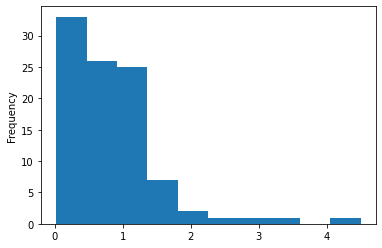

In [50]:
error_ratio.plot.hist()

In [51]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

In [52]:
# Add in more predictors
# Try different models